In [168]:
#Junior Colloquium
#Scatter Plots and Data Storage
#Gan Zhang (ganzhang@princeton.edu)

In [169]:
import numpy as np
import urllib.request 
import re

hurricane_data=urllib.request.urlopen("https://www.esrl.noaa.gov/psd/data/correlation/hurr.data")

for x in hurricane_data: 
    print(x)
 

b' 1948 2016\n'
b' 1948   0.00   0.00   0.00   0.00   0.00   0.00   0.00   5.50  10.00   4.50   0.75   0.00\n'
b' 1949   0.00   0.00   0.00   0.00   0.00   0.00   0.00   8.00   8.75   4.25   0.00   0.00\n'
b' 1950   0.00   0.00   0.00   0.00   0.00   0.00   0.00  16.00  24.25  12.75   0.00   0.00\n'
b' 1951   0.00   0.00   0.00   0.00   6.50   0.00   0.00   7.00  15.50   4.25   0.00   1.00\n'
b' 1952   0.00   0.00   0.00   0.00   0.00   0.00   0.00   1.75   8.75   5.00   0.00   0.00\n'
b' 1953   0.00   0.00   0.00   0.00   0.00   0.00   0.00   2.75  13.75   2.50   0.00   0.00\n'
b' 1954   0.00   0.00   0.00   0.00   0.00   1.00   0.00   4.00   5.75  14.75   0.00   0.50\n'
b' 1955   2.00   0.00   0.00   0.00   0.00   0.00   0.00  16.50  23.50   1.00   0.00   0.00\n'
b' 1956   0.00   0.00   0.00   0.00   0.00   0.00   0.50   8.50   1.50   0.00   2.50   0.00\n'
b' 1957   0.00   0.00   0.00   0.00   0.00   2.25   0.00   0.00  18.75   0.00   0.00   0.00\n'
b' 1958   0.00   0.00   0.00   0.0

In [170]:
# A second try, read the strings and convert them numeric values 

yr_start = 1979
yr_end   = 2016

# create an array to store the data
hurr_data = np.zeros((yr_end-yr_start+1, 13))
icount = 0

hurricane_data=urllib.request.urlopen("https://www.esrl.noaa.gov/psd/data/correlation/hurr.data")

for line in hurricane_data: 
    
    linex = re.sub(' +', ' ', line.decode('utf-8'))
    hurr_data_temp0=np.asarray( linex.strip().split(" ") ) 

    # What are the purposes of the two-line code above?
    # Hints: 1) real world data are messy
    #        2) try hurr_data_temp0 = line
    
    print(hurr_data_temp0)    
    
    if len(hurr_data_temp0) == 13: 
        #print("\n possible data line... converting strings to numeric values \n")
        hurr_data_temp=hurr_data_temp0.astype(np.float)
    
        if hurr_data_temp[0] >= yr_start and hurr_data_temp[0] <= yr_end:
            print("\n data within desired year range \n")
            hurr_data[icount,:] = hurr_data_temp
            icount = icount+1


['1948' '2016']
['1948' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '5.50' '10.00'
 '4.50' '0.75' '0.00']
['1949' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '8.00' '8.75'
 '4.25' '0.00' '0.00']
['1950' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '16.00' '24.25'
 '12.75' '0.00' '0.00']
['1951' '0.00' '0.00' '0.00' '0.00' '6.50' '0.00' '0.00' '7.00' '15.50'
 '4.25' '0.00' '1.00']
['1952' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '1.75' '8.75'
 '5.00' '0.00' '0.00']
['1953' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '2.75' '13.75'
 '2.50' '0.00' '0.00']
['1954' '0.00' '0.00' '0.00' '0.00' '0.00' '1.00' '0.00' '4.00' '5.75'
 '14.75' '0.00' '0.50']
['1955' '2.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '16.50' '23.50'
 '1.00' '0.00' '0.00']
['1956' '0.00' '0.00' '0.00' '0.00' '0.00' '0.00' '0.50' '8.50' '1.50'
 '0.00' '2.50' '0.00']
['1957' '0.00' '0.00' '0.00' '0.00' '0.00' '2.25' '0.00' '0.00' '18.75'
 '0.00' '0.00' '0.00']
['1958' '0.00' '0.00' '0.00' '0.00

In [171]:
np.set_printoptions(precision=2, suppress=True)

# print out the multi-year means for each month (Jan-Dec) 
print(hurr_data[:,1:].mean(axis=0) )

[ 0.03  0.    0.    0.    0.    0.11  0.97  5.68 11.59  3.89  1.19  0.22]


In [172]:
# looks like most hurricanes occur during the 7th to the 11th months
# Let's sum up values for each year
hurr_jason=hurr_data[:,7:12].sum(axis=1)
print(hurr_jason)

[21.75 38.25 22.5   5.25  3.5  15.5  21.25  9.5   5.   21.25 31.75 26.75
  8.25 16.    9.5   7.25 60.75 45.    9.5  48.   41.   32.75 25.5  10.75
 32.75 45.5  44.75 21.25 12.25 30.5  12.   37.5  26.   27.75  3.25 17.75
 12.   26.5 ]


In [173]:
yr_start = 1979
yr_end   = 2016
nina_data = np.zeros((yr_end-yr_start+1, 13))
icount = 0

# What could affect hurricane activity? let's get some ENSO data
enso_data=urllib.request.urlopen("https://www.esrl.noaa.gov/psd/data/correlation/nina34.data")

for line in enso_data: 
    linex = re.sub(' +', ' ', line.decode('utf-8'))
    nina_data_temp0=np.asarray( linex.strip().split(" ") ) 
    #print(nina_data_temp0)
    
    if len(nina_data_temp0) == 13: 
        #print("\n possible data line... converting strings to numeric values \n")
        nina_data_temp=nina_data_temp0.astype(np.float)
        #print(nina_data_temp)
    
        if nina_data_temp[0] >= yr_start and nina_data_temp[0] <= yr_end:
            #print("\n data within desired year range \n")
            nina_data[icount,:] = nina_data_temp
            icount = icount+1

nina_jason=nina_data[:,7:12].mean(axis=1)


Text(0.5, 1.0, 'Hurricane-ENSO Relation (Jul-Nov)')

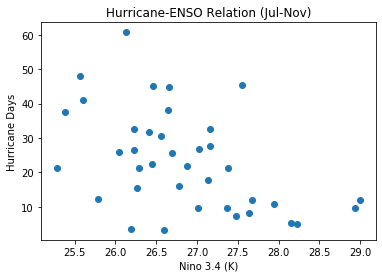

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(nina_jason, hurr_jason)
#plt.plot(nina_jason, hurr_jason, 'o', color='black');


plt.ylabel('Hurricane Days')
plt.xlabel('Nino 3.4 (K)')
plt.title("Hurricane-ENSO Relation (Jul-Nov)")


Text(0.5, 1.0, 'Hurricane-ENSO Relation (Jul-Nov)')

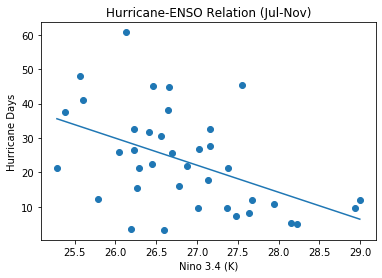

In [177]:
import matplotlib.pyplot as plt

X = nina_jason
Y = hurr_jason

from numpy.polynomial.polynomial import polyfit

intercept, slope = polyfit(X, Y, 1)
plt.scatter(X,Y)

X_plot = np.linspace(np.min(X),np.max(X),100)
plt.plot(X_plot, X_plot*slope + intercept)

plt.ylabel('Hurricane Days')
plt.xlabel('Nino 3.4 (K)')
plt.title("Hurricane-ENSO Relation (Jul-Nov)")


# What can the following lines do? 

#import statsmodels.api as smodel
#
#results = smodel.OLS(Y,smodel.add_constant(X)).fit()
#
#plt.scatter(X,Y)
#X_plot = np.linspace(np.min(X),np.max(X),100)
#plt.plot(X_plot, X_plot*results.params[1] + results.params[0])
#
#plt.ylabel('Hurricane Days')
#plt.xlabel('Nino 3.4 (K)')
#plt.title("Hurricane-ENSO Relation (Jul-Nov)")

#plt.show()

#print(results.summary())


In [ ]:
from netCDF4 import Dataset, num2date
rootgrp = Dataset("hurr_nina34.nc", "w", format="NETCDF4")
rootgrp.createDimension("year", len(keepx_ind[0]))

hurr=rootgrp.createVariable("hurr","f4",("year"))
hurr[:]=hurr
nina34=rootgrp.createVariable("nina34","f4",("year"))
nina34[:]=nina34

rootgrp.close()